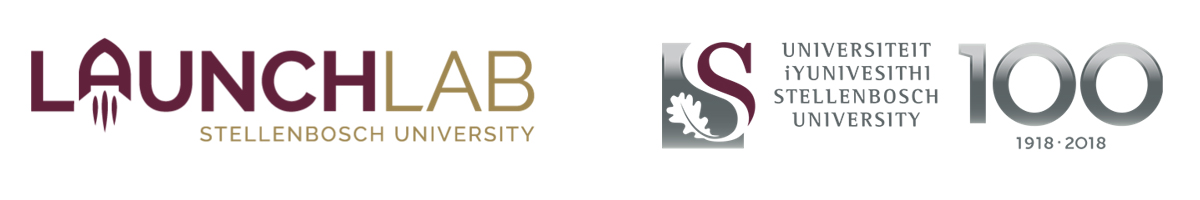

# Assignment 5 Part 2: Seaborn
The following assignment is based on the data in diamonds.csv

The features are described as follows:

Carat: a unit of weight.

Cut: the quality of the diamond's cut.

Color: the color code of the diamond.

Clarity: the clarity code of the diamond.

Depth: the size of the diamond's depth as a percentage.

Table: the size of the diamond's table as a percentage.

Price: the price of the diamond.

x, y, z: the dimensions of the diamond.

## For this assignment all plots should be written using the **seaborn** package.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
%matplotlib inline

df = pd.read_csv('diamonds.csv',index_col=0).reset_index(drop=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.53,Ideal,D,VS,61.4,56.0,1857,5.20,5.23,3.20
1,0.70,Very Good,D,SI,63.4,58.0,2734,5.63,5.66,3.58
2,1.00,Premium,G,VS,62.0,62.0,6115,6.38,6.33,3.94
3,1.22,Premium,D,SI,61.8,58.0,5643,6.86,6.80,4.22
4,0.41,Very Good,E,VS,62.7,58.0,833,4.68,4.73,2.95


# Analysing Counts

## For each catergorical feature, visualise the counts using a barplot.

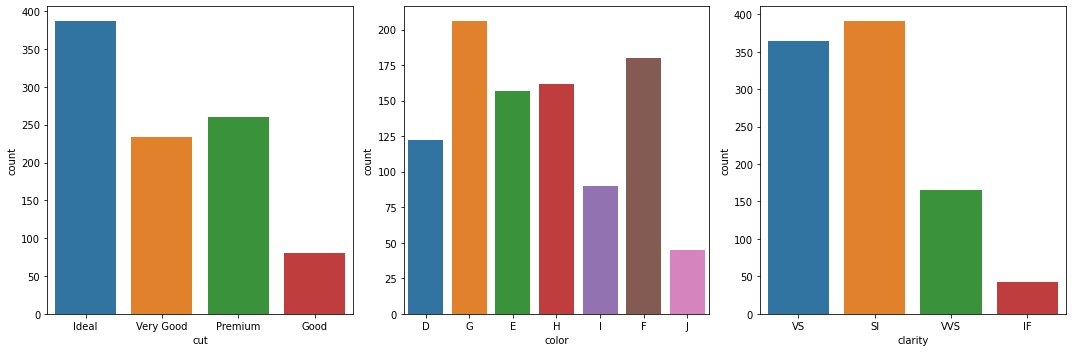

In [3]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
categories = ['cut','color','clarity']

# insert code here
for i, category in enumerate(categories):
    sns.countplot(ax=ax[i], x =category, data=df)

plt.tight_layout()
plt.show()

# Identifying outliers
 
## Plot for the following features boxplots to identify any outliers:
carat, depth, table and price

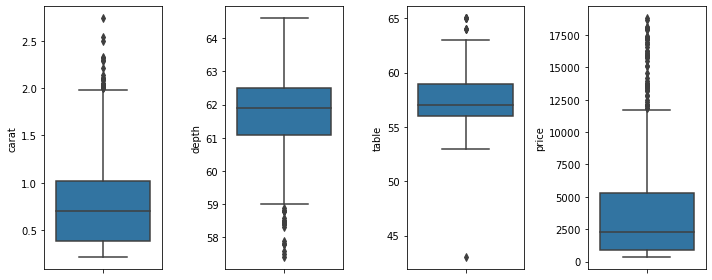

In [6]:
fig, ax = plt.subplots(1,4, figsize=(10,4))
categories = ['carat','depth','table','price']

#insert code here
for i, category in enumerate(categories):
    sns.boxplot(ax=ax[i], y=category, data=df)

plt.tight_layout()
plt.show()

There are many different techniques to detect outliers, here we will be using inter-quartile range (as used by matplotlib/seaborn).

Consider any points outside of 1.5 $\times$ IQR from a quartile as an outlier.

## Write code to remove these outliers from the dataframe
By removing any outliers, it is now easier to visualise the distributions of the dataset

In [7]:
import numpy as np
categories = ['carat','depth','table','price']

for category in categories:
    # compute IQR
    Q3 = df[category].quantile(0.75)
    Q1 = df[category].quantile(0.25)
    IQR = Q3 - Q1
    UL = Q3 + 1.5*IQR
    LL = Q1 - 1.5*IQR
    # Update DF
    df.loc[df[category] < LL, category] = np.nan
    df.loc[df[category] > UL, category] = np.nan
    df[category].dropna()

## Once again plot the boxplots for the following features:
carat, depth, table and price

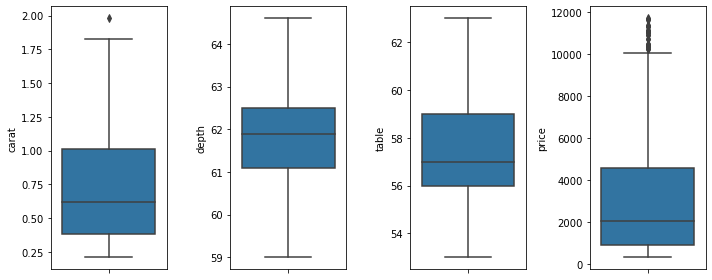

In [9]:
fig, ax = plt.subplots(1,4, figsize=(10,4))
categories = ['carat','depth','table','price']

# insert code here
for i, category in enumerate(categories):
    sns.boxplot(ax=ax[i], y=category, data=df)

plt.tight_layout()
plt.show()

## Explain why the boxplots above have fliers that indicate there are still outliers present in the data?
Within the updated dataframe(after the outliers were removed) the values that are shown as fliers are considered outliers within thier respective categories as a result of the new distribution caused by the removal of the previos outliers.

# Analysing continuous features
## Visualise the correlation of the following features:

x, y ,z and carat

Use a multi-plot grid that incorporates scatterplots and histograms in its diagonal.

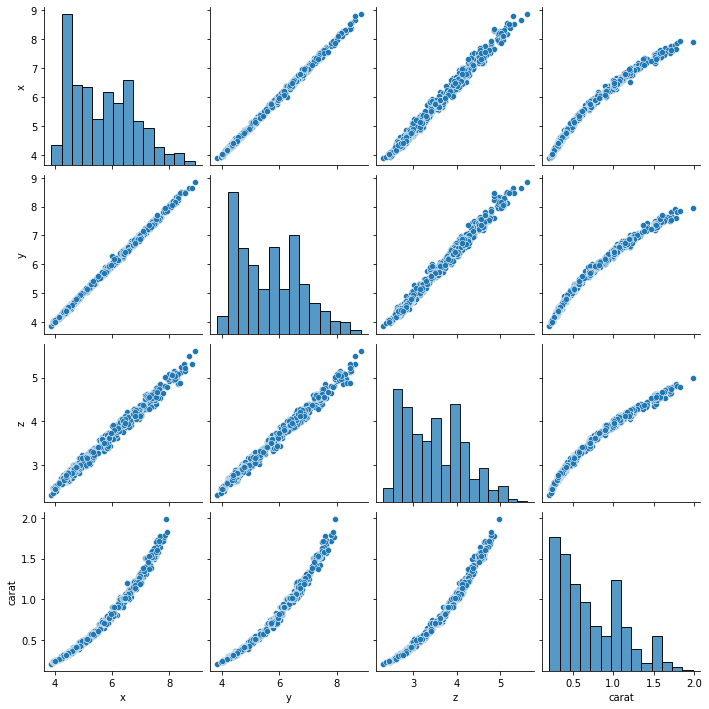

In [10]:
# insert code here
sns.pairplot(df[['x', 'y', 'z', 'carat']], kind ='scatter')


## Comment on the reletionship between these features.
There is a strong positive correlation between these features.

## Can you explain the non-linear relationship carat exhibits with the remaining features?
The weight(carat) of a diamond do not increase linearly with the dimensions (x, y, z) of a diamond. The dimensions depend on the cut of the diamond, while the cut of the diamond has less of an influence on the weight of a diamond. 


## Visualise the distributions of the following variables:
carat, table, depth and price

### Use a multi-plot grid that incorporates scatterplots in its upper half, histograms in its diagonal and contourplots in its lower half.

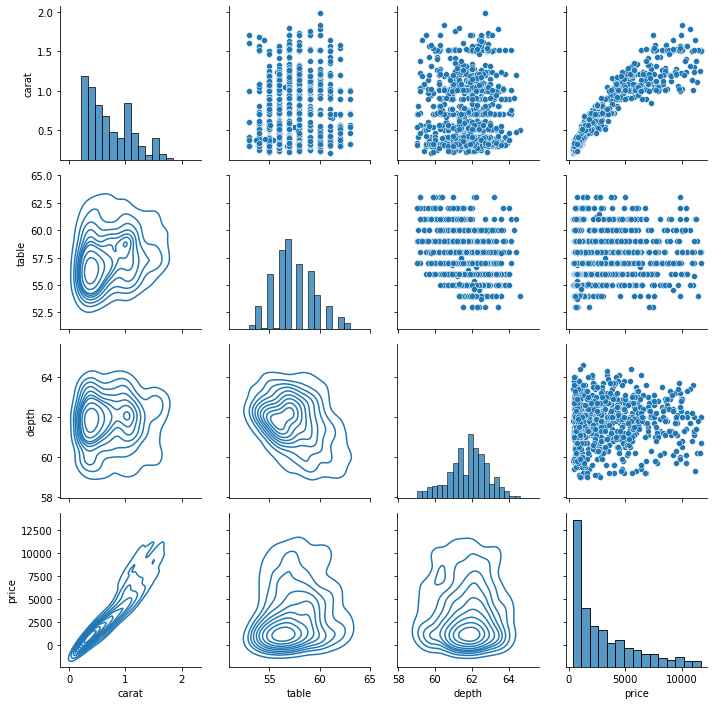

In [11]:
# insert code here
g = sns.PairGrid(df[['carat', 'table', 'depth', 'price']])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

## What conclusions can you draw from the multi-plot above?
Carat and price have a strong positive correlation, while table and depth are not correlated with price. Therefore as the carat of a diamond increases the price will increase, but the value of the table and depth of the diamond have no influence on the price of the diamond.

## Conditional plots
Visualise the relationship **'cut'** exhibits on the following features:

carat, table, depth and price

### Use a multi-plot grid with scatterplots and density functions on the diagonal.

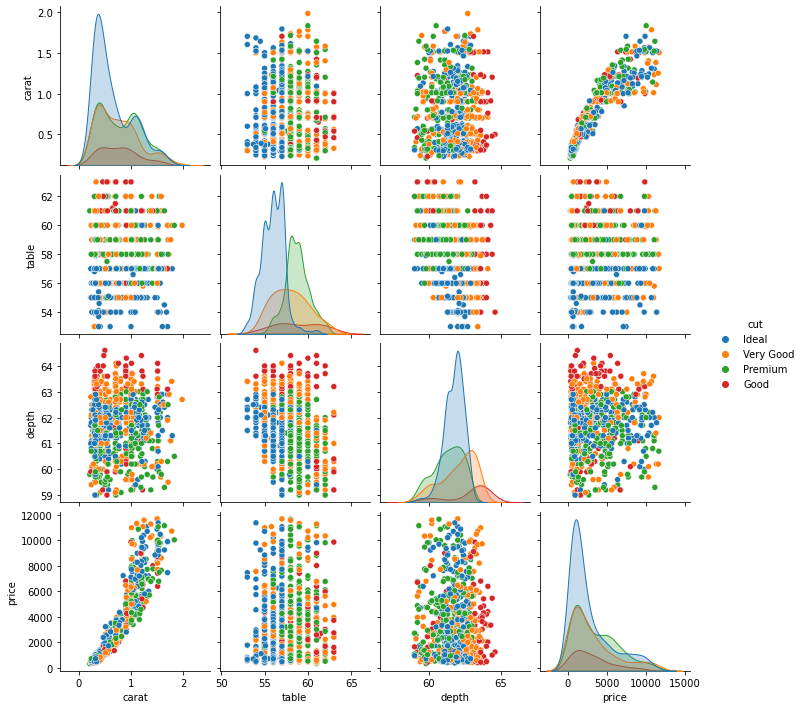

In [12]:
# insert code here
g = sns.pairplot(df[['carat','table','depth','price', 'cut']], hue= 'cut', diag_kind="kde")

## Where is the difference between diamonds with 'Ideal' vs 'Premium' cuts most visible? Explain.
The difference between ideal and premium diamond cuts is seen in table, where ideal diamond cuts have a lower table percentage than premium diamond cuts.


## Discuss with the help of a heatmap the correlation of the following variables:
Carat, depth, table and price

## Furthermore what does this correlation tell us of a diamond?

<AxesSubplot:>

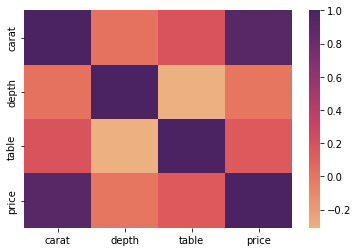

In [13]:
# insert code here
sns.heatmap(df[['carat', 'depth', 'table', 'price']].corr(), cmap = 'flare')

Carat and depth are not correlated. 
Carat and table have a weak positive correlation.
Carat and price have a strong positive correlation.

# Categorical features

## To visualise the distributions of each category, plot boxplots for each of the following features:
(Price, carat, table, depth) vs (cut, color, clarity)

### Furthermore, order the boxplots within a plot by their mean value
Hint: pd.sort_values() is your friend.

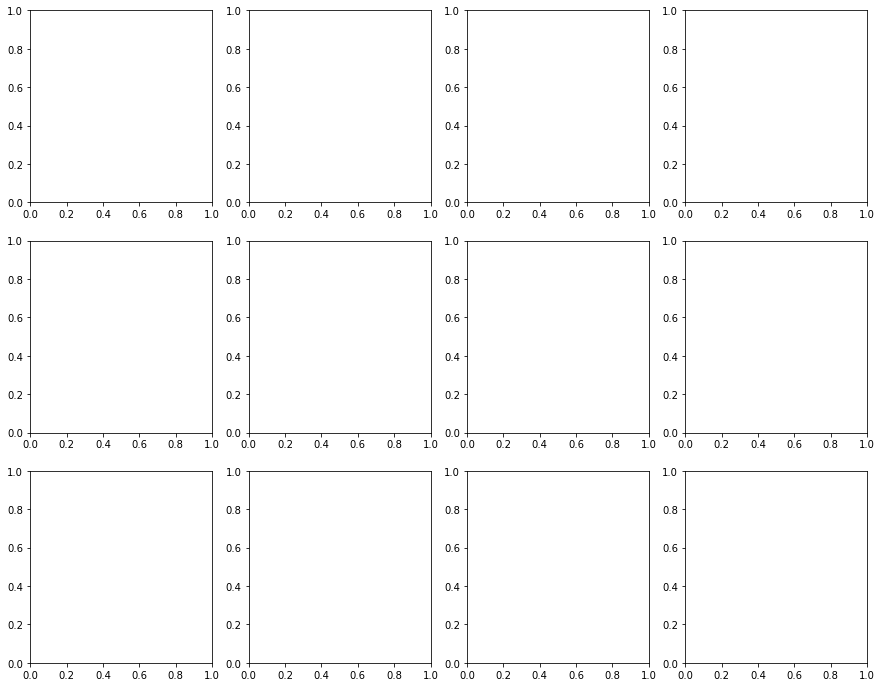

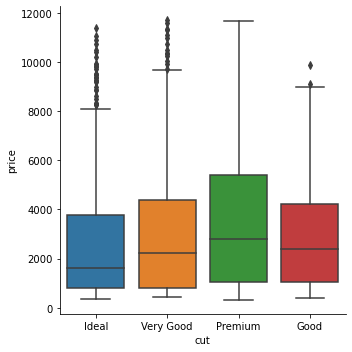

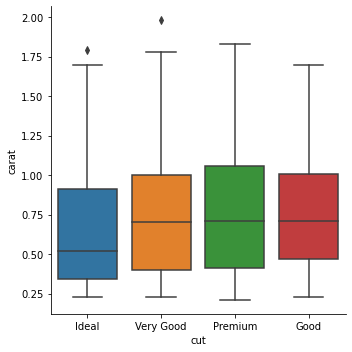

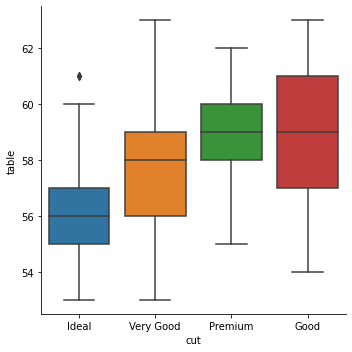

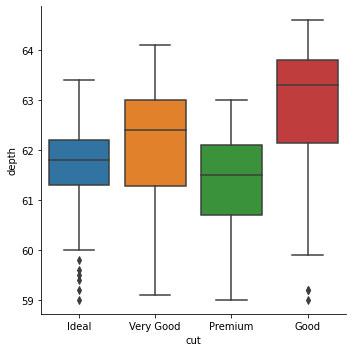

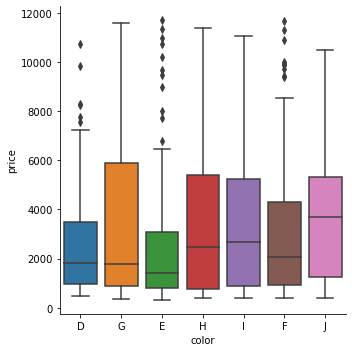

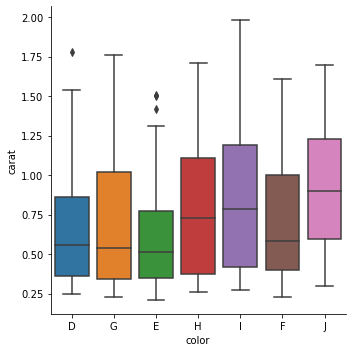

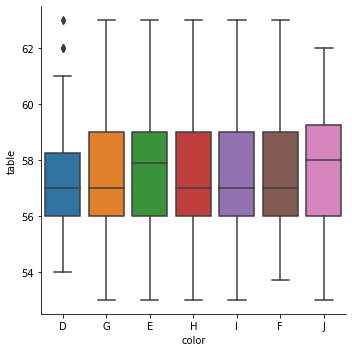

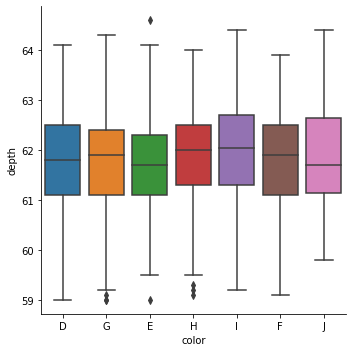

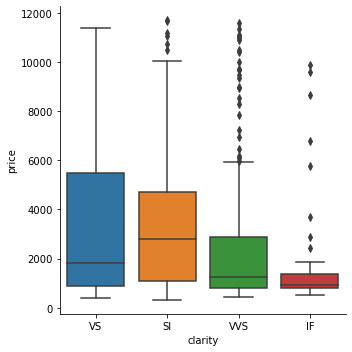

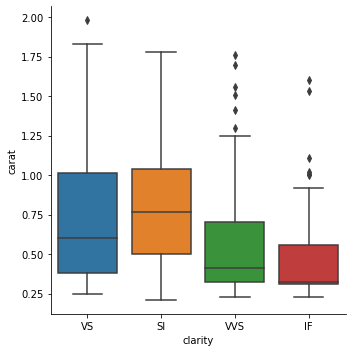

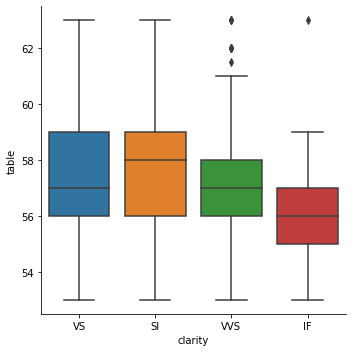

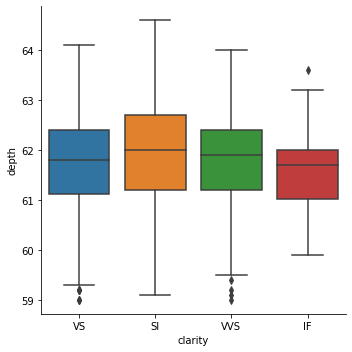

In [17]:
fig, ax = plt.subplots(3,4, figsize=(15,12))
features = ['price','carat','table','depth']
categories = ['cut','color','clarity']

for category in categories:
    for feature in features:
        # sort values
        df[feature].mean()
        # plot boxplot
        sns.catplot(x= category, y = feature, data=df, kind = 'box')

plt.tight_layout()
plt.show()

## Discuss any visible tendencies that can be exhibited in the plots above.

Cut has large influence on table and depth. Clarity, color and cut all have a large impact on the price of the diamond, with VS clarity, G color and Premium cut having the highest average prices. 

## Which single categorical feature has the largest influence on each of the numerical features?
Clarity
